In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

C:\Users\kekay\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('data/model_df.csv')

In [3]:
df.head()

,County,State,per capita income,median household income,median family income,population,number of households,x,y,Has Market,state_nums
0,"AL, Cullman",Alabama,20760,38847,47103,80499,31342,-86.844284,34.179405,1.0,1
1,"AL, Winston",Alabama,18995,32900,41113,24342,9489,-87.608253,34.231731,1.0,1
2,"AL, Clarke",Alabama,18979,29357,45518,25573,9631,-87.776726,31.709833,1.0,1
3,"AL, Henry",Alabama,21924,41650,54725,17308,7001,0.000000,0.000000,0.0,1
4,"AL, Franklin",Alabama,18888,36415,46536,31666,12437,-88.143646,34.439522,1.0,1


In [4]:
target=df['Has Market']
data = df.drop(['Has Market', 'County', 'x', 'y', 'State'], axis=1)

In [5]:
data.dtypes

per capita income          int64
median household income    int64
median family income       int64
population                 int64
number of households       int64
state_nums                 int64
dtype: object

In [6]:
data_train, data_test, target_train, target_test = train_test_split(data, target, 
                                                                    test_size = 0.25, random_state=123)

In [7]:
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5) 
tree_clf.fit(data_train, target_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [8]:
tree_clf.feature_importances_

array([0.02782833, 0.00609253, 0.02450599, 0.        , 0.83808164,
       0.10349151])

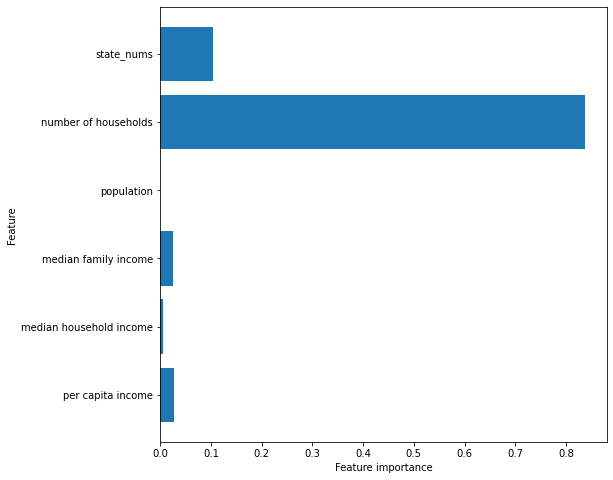

In [9]:
def plot_feature_importances(model):
    n_features = data_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), data_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

plot_feature_importances(tree_clf)

# Model

# Bagged Tree

In [11]:
# Instantiate a BaggingClassifier
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), 
                                 n_estimators=20)

In [12]:
bagged_tree.fit(data_train, target_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
       

In [13]:
bagged_tree.score(data_train, target_train)


0.8866937826844857

In [14]:
bagged_tree.score(data_test, target_test)


0.8617083091226031

In [34]:
print('Accuracy: {:.4}%'.format(bagged_tree.score(data_test, target_test)*100))

Accuracy: 86.17%


# Random Forests

In [15]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [16]:
forest.score(data_train, target_train)


0.8820453224869262

In [17]:
forest.score(data_test, target_test)


0.8646135967460779

In [18]:
data_test.head()

,per capita income,median household income,median family income,population,number of households,state_nums
3438,23637,50527,65057,33188,13117,24
3333,23879,48943,58357,139906,50007,23
6006,22709,42125,55000,3924,1518,42
4853,27818,49669,64157,541592,220375,34
20,26766,50221,60864,187114,73283,1


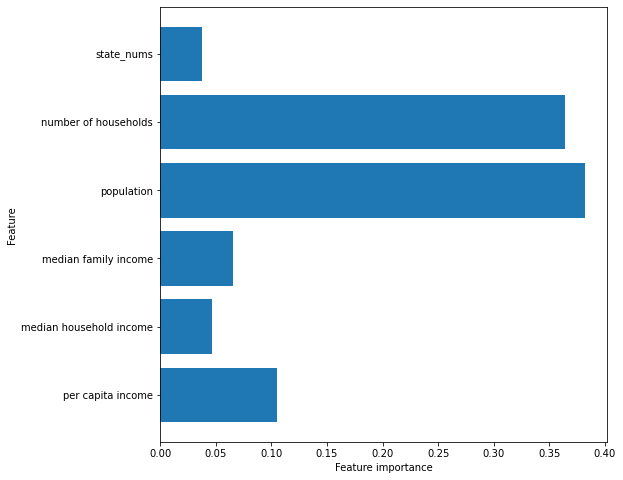

In [19]:
plot_feature_importances(forest)


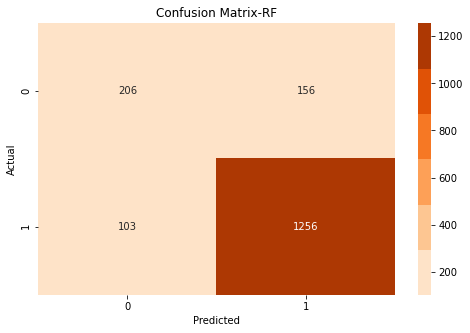

Accuracy: 86.46%
[[ 206  156]
 [ 103 1256]]
              precision    recall  f1-score   support

         0.0       0.67      0.57      0.61       362
         1.0       0.89      0.92      0.91      1359

    accuracy                           0.85      1721
   macro avg       0.78      0.75      0.76      1721
weighted avg       0.84      0.85      0.85      1721



In [20]:
pred = tree_clf.predict(data_test)


cm = confusion_matrix(target_test, pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, cmap=sns.color_palette('Oranges'), fmt='0.4g')
plt.title('Confusion Matrix-RF')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print('Accuracy: {:.4}%'.format(forest.score(data_test, target_test)*100))
print(confusion_matrix(target_test, pred))
print(classification_report(target_test, pred))

# Forest 2

In [21]:
forest_2 = RandomForestClassifier(n_estimators = 4, max_features= 5, max_depth= 3)
forest_2.fit(data_train, target_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=4,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
# First tree from forest_2
rf_tree_1 = forest_2.estimators_[0]

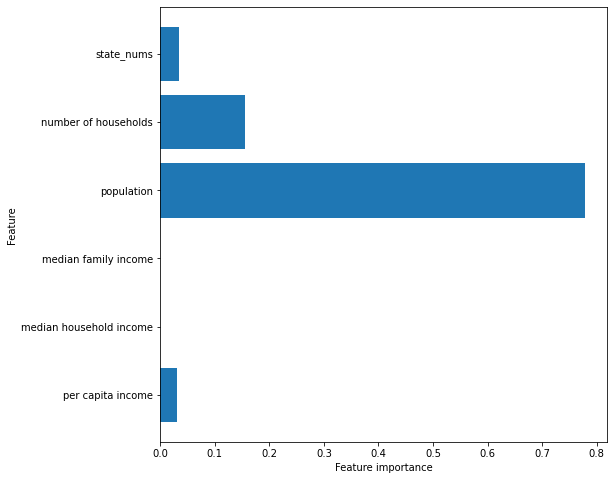

In [23]:
plot_feature_importances(rf_tree_1)

In [32]:
print('Accuracy: {:.4}%'.format(rf_tree_1.score(data_test, target_test)*100))

Accuracy: 85.76%


In [24]:
rf_tree_2 = forest_2.estimators_[1]

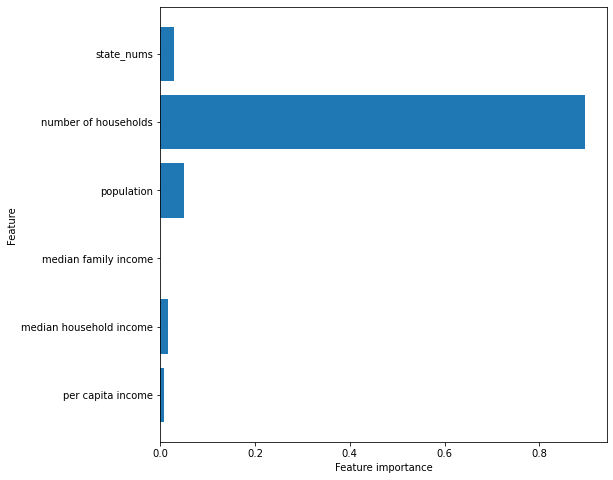

In [25]:
plot_feature_importances(rf_tree_2)

In [33]:
print('Accuracy: {:.4}%'.format(rf_tree_2.score(data_test, target_test)*100))

Accuracy: 85.01%


# Evaluate

In [36]:
print('Random Forest Accuracy: {:.4}%'.format(forest.score(data_test, target_test)*100))
print('Bagged Tree Accuracy: {:.4}%'.format(bagged_tree.score(data_test, target_test)*100))
print('Random Forest 2 Accuracy: {:.4}%'.format(rf_tree_1.score(data_test, target_test)*100))

Random Forest Accuracy: 86.46%
Bagged Tree Accuracy: 86.17%
Random Forest 2 Accuracy: 85.76%


In [26]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, data_train, target_train, cv=3))

print(f"Mean Cross Validation Score for Random Forest Classifier: {mean_rf_cv_score :.2%}")

Mean Cross Validation Score for Random Forest Classifier: 85.88%


C:\Users\kekay\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kekay\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\kekay\anaconda3\envs\learn-env\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [27]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [3, 6]
}

In [28]:
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(data_train, target_train)

print(f"Training Accuracy: {rf_grid_search.best_score_ :.2%}")
print("")
print(f"Optimal Parameters: {rf_grid_search.best_params_}")

Training Accuracy: 87.35%

Optimal Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 30}


In [40]:
rf_score = rf_grid_search.score(data_test, target_test)

print('Random forest grid search: ', rf_score)

Random forest grid search:  0.8744915746658919


# Pickle and Save

In [26]:
import pickle
from joblib import dump, load

In [27]:
dump(forest, "./models/random_forest_07102020.pkl")

['./models/random_forest_07102020.pkl']

In [28]:
def evaluate_data(data=None):
    import sys
    import numpy as np 
    np.set_printoptions(threshold=sys.maxsize)
    
    features = ['state_nums', 'number of households', 'population', 'median family income', 
                'median household income', 'per capita income']
    data = data[features]
    rf_loaded = load("./models/random_forest_07102020.pkl")
    labels = rf_loaded.predict(data)
    print(labels)
    return

In [29]:
evaluate_data(data_test.iloc[[0]])

[1.]


In [30]:
evaluate_data(data_test)

[1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.

In [32]:
data.to_csv("./data/farmers_market_model.csv", index=False)

In [33]:
data.sample(n=20).to_csv("./data/fm_model_sample.csv", index=False)

In [ ]:
python evaluator.py -f "./data/fm_model_sample.csv"